In [95]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import warnings

In [96]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 8,4

In [97]:
movies = pd.read_csv('P4-Movie-Ratings.csv')

In [98]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [99]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [100]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRatings',
       'Budget', 'Year']

In [101]:
movies.head()

,Film,Genre,CriticRating,AudienceRatings,Budget,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [102]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             559 non-null    object
 1   Genre            559 non-null    object
 2   CriticRating     559 non-null    int64 
 3   AudienceRatings  559 non-null    int64 
 4   Budget           559 non-null    int64 
 5   Year             559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [103]:
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')
movies.columns

Index(['Film', 'Genre', 'CriticRating', 'AudienceRatings', 'Budget', 'Year'], dtype='object')

In [104]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             559 non-null    category
 1   Genre            559 non-null    category
 2   CriticRating     559 non-null    int64   
 3   AudienceRatings  559 non-null    int64   
 4   Budget           559 non-null    int64   
 5   Year             559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


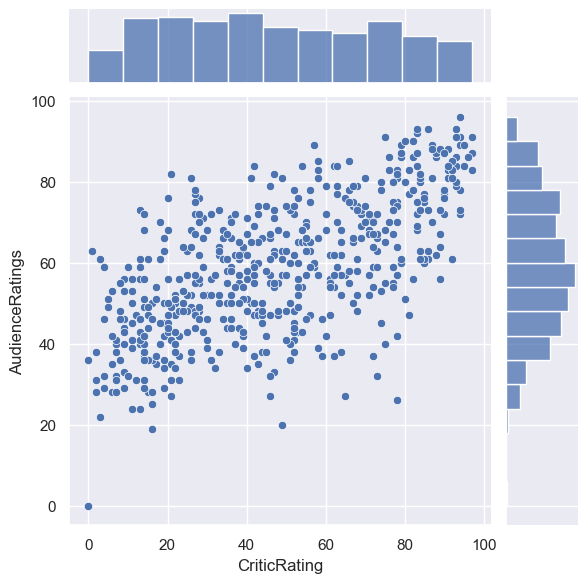

In [105]:
j = sns.jointplot(x = 'CriticRating', y = 'AudienceRatings',data = movies, kind = 'scatter')

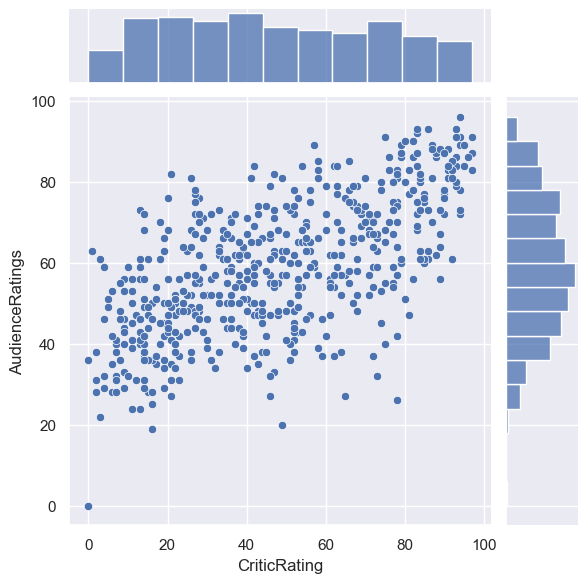

In [106]:
j = sns.jointplot(x = 'CriticRating', y = 'AudienceRatings',data = movies, )

### Histograms 

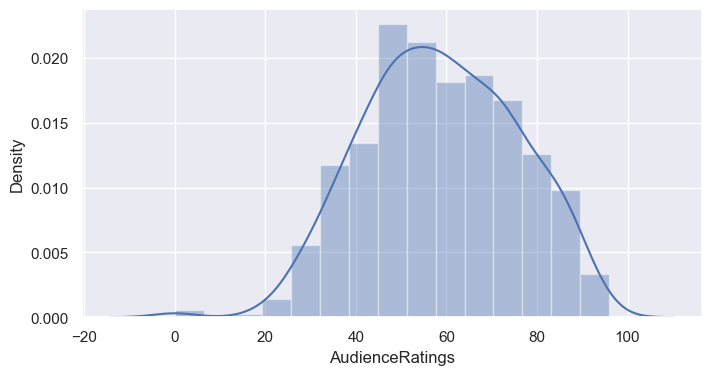

In [107]:
h1 = sns.distplot(movies.AudienceRatings, bins = 15)   ## Normal Distribution 

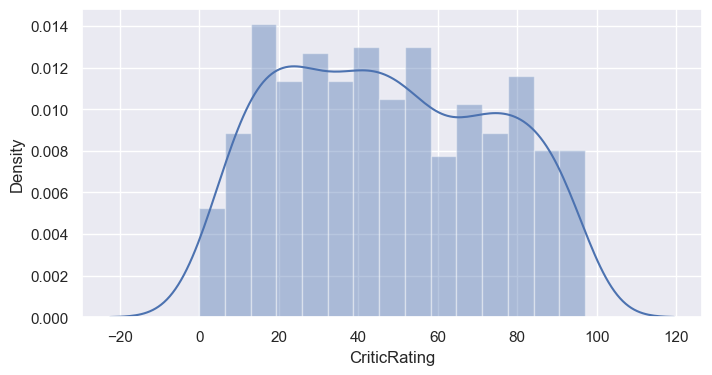

In [108]:
h2 = sns.distplot(movies.CriticRating, bins = 15)      ## Uniform Distribution 

### Stacked Histograms 

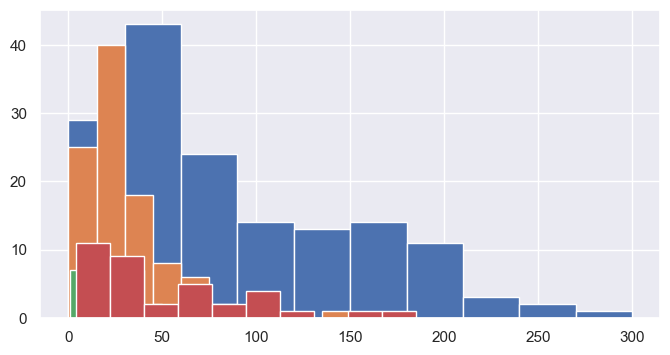

In [109]:
plt.hist(movies[movies.Genre=='Action'].Budget)
plt.hist(movies[movies.Genre=='Drama'].Budget)
plt.hist(movies[movies.Genre=='Horror'].Budget)
plt.hist(movies[movies.Genre=='Thriller'].Budget)
plt.show()

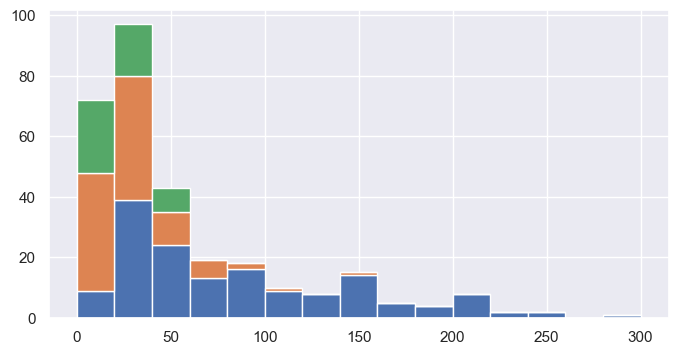

In [110]:
plt.hist([movies[movies.Genre=='Action'].Budget,\
         movies[movies.Genre=='Drama'].Budget,\
         movies[movies.Genre=='Horror'].Budget], bins = 15, stacked = True)
plt.show()

In [111]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [112]:
for genre in movies.Genre.cat.categories:
    print (genre)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


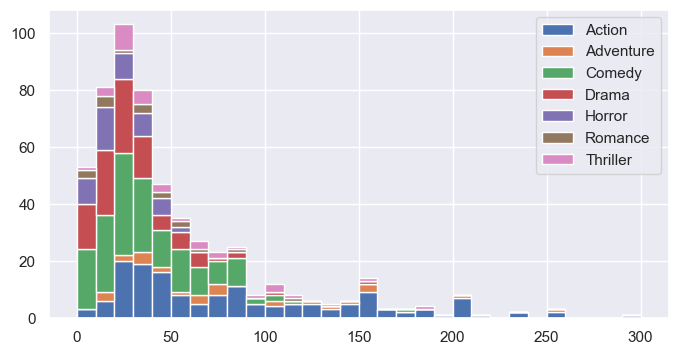

In [113]:
list1 = list()
mylabels = list()
for genre in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == genre].Budget)
    mylabels.append(genre)
h= plt.hist(list1, bins = 30, stacked = True, label = mylabels)
plt.legend()
plt.show()

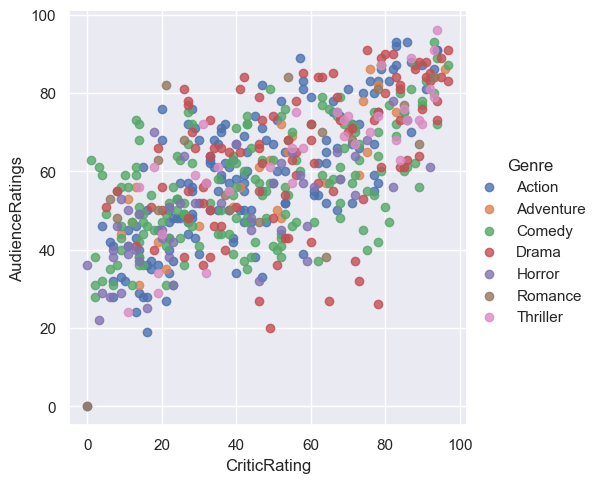

In [114]:
vS1 = sns.lmplot(x = 'CriticRating', y = 'AudienceRatings',data = movies,fit_reg = False, hue = 'Genre',size = 7, aspect = 1 )


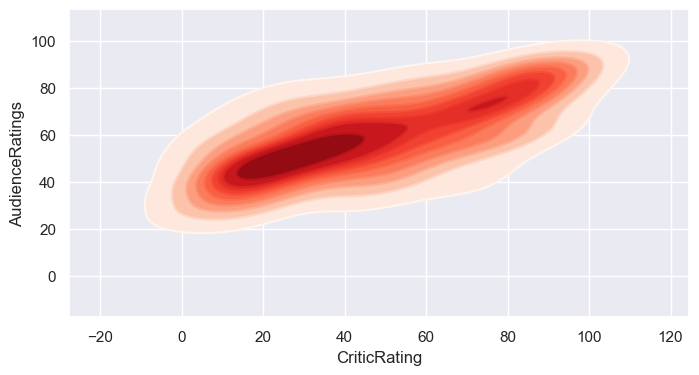

In [158]:
k1 = sns.kdeplot(x = 'CriticRating', y= 'AudienceRatings',data = movies, shade = True, shade_lowest = False, cmap ='Reds')
k1b = sns.kdeplot(x = 'CriticRating', y= 'AudienceRatings',data = movies, cmap = 'Reds')

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import warnings

### Violin Pplots 

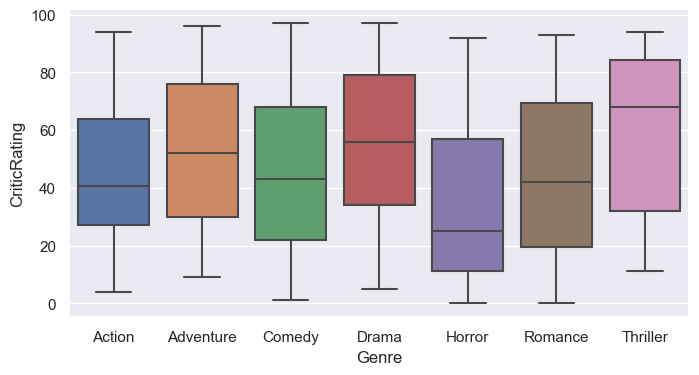

In [126]:
w = sns.boxplot(data = movies, x = 'Genre', y = 'CriticRating')


<Axes: xlabel='Year', ylabel='CriticRating'>

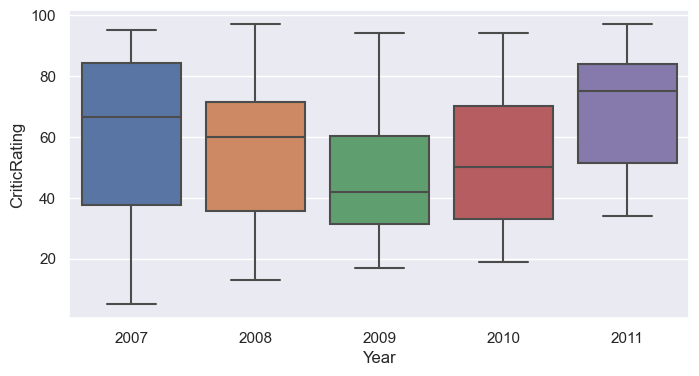

In [136]:
sns.boxplot(data=movies[movies.Genre == 'Drama'], x = 'Year', y = 'CriticRating') 

## Creating a Facit Grid

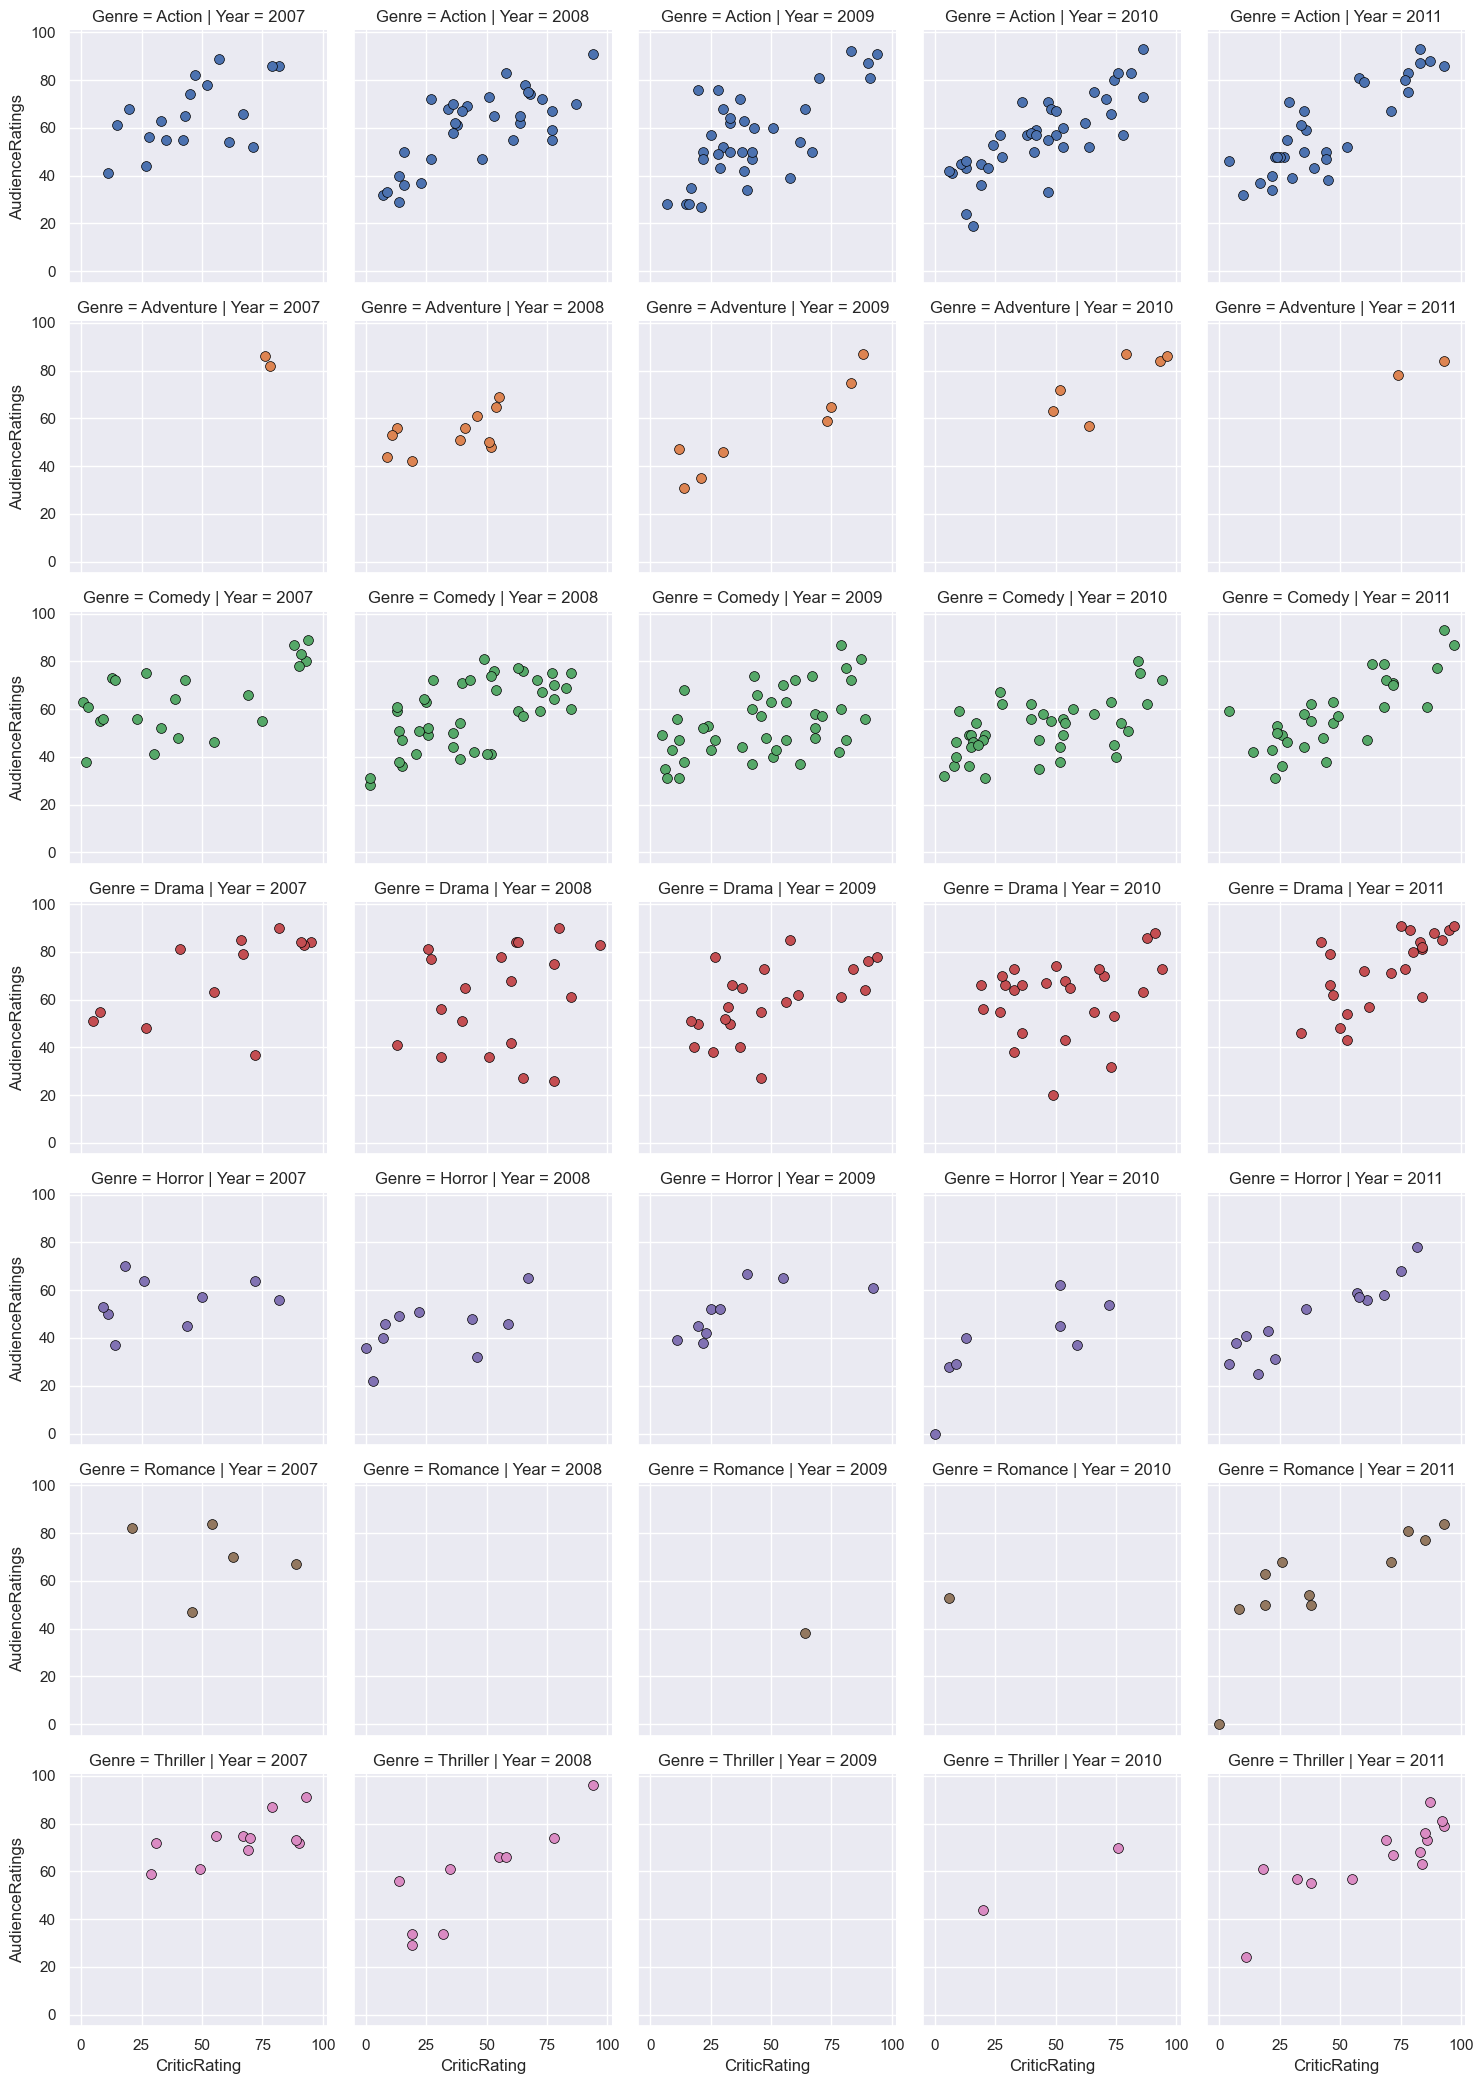

In [144]:
g =sns.FacetGrid(movies, row = 'Genre',col = 'Year', hue = 'Genre')
kws = dict(s=50, linewidth = 0.5, edgecolor= 'black') 
g=g.map(plt.scatter,'CriticRating', 'AudienceRatings', **kws )

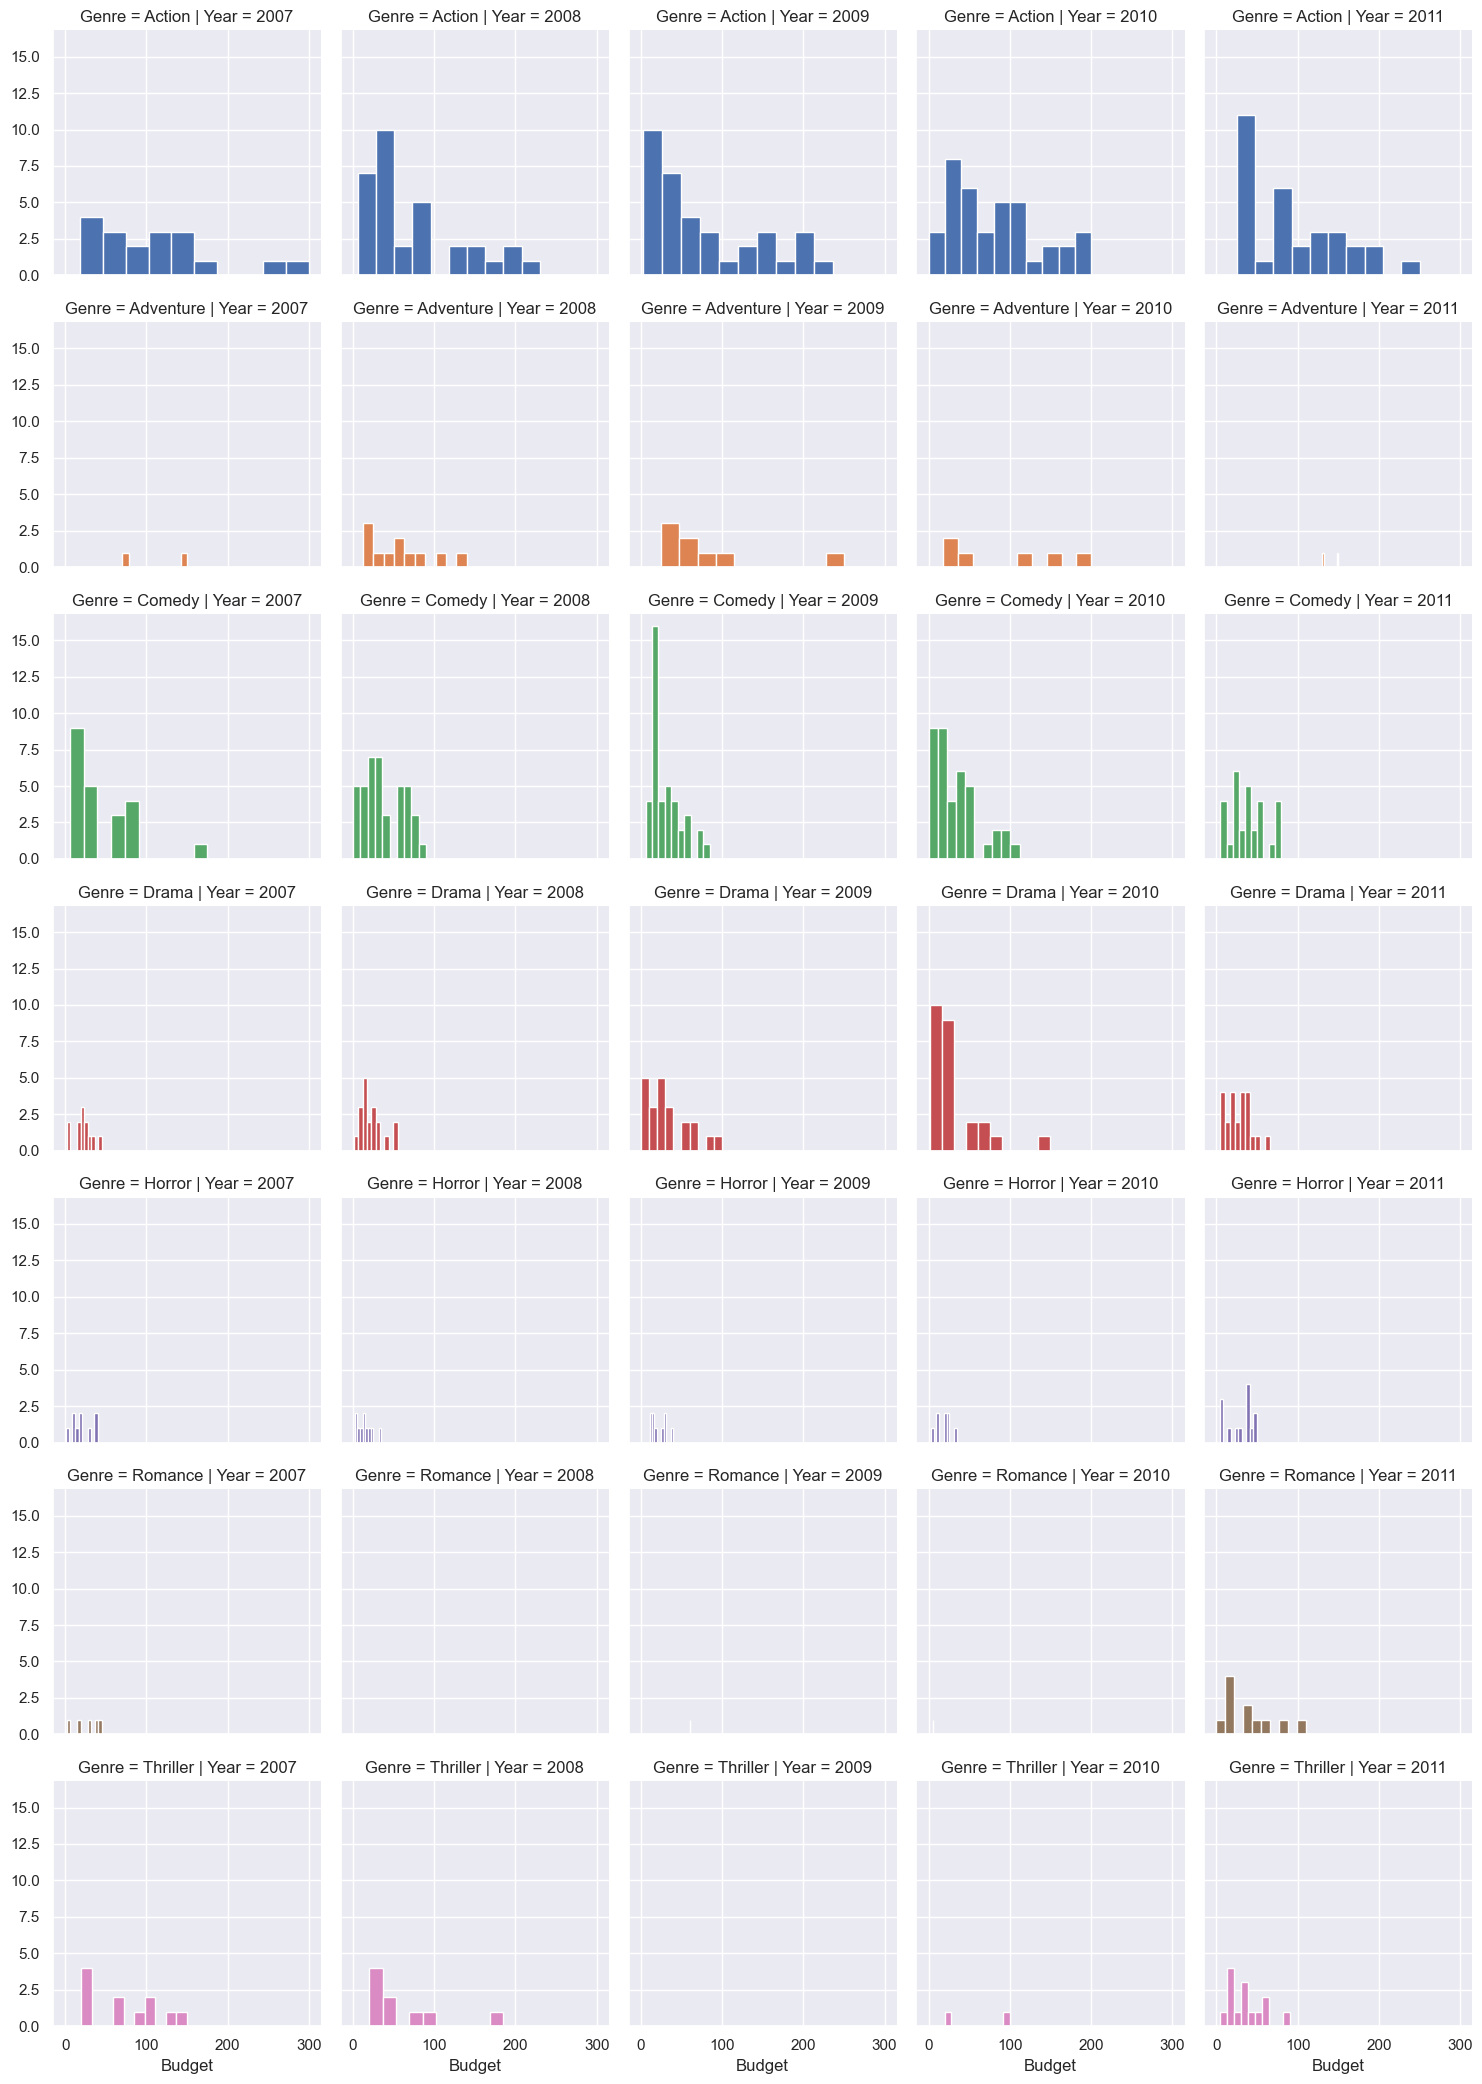

In [143]:
g =sns.FacetGrid(movies, row = 'Genre',col = 'Year', hue = 'Genre')
g=g.map(plt.hist,'Budget' )

### Controling axis and adding diagonals

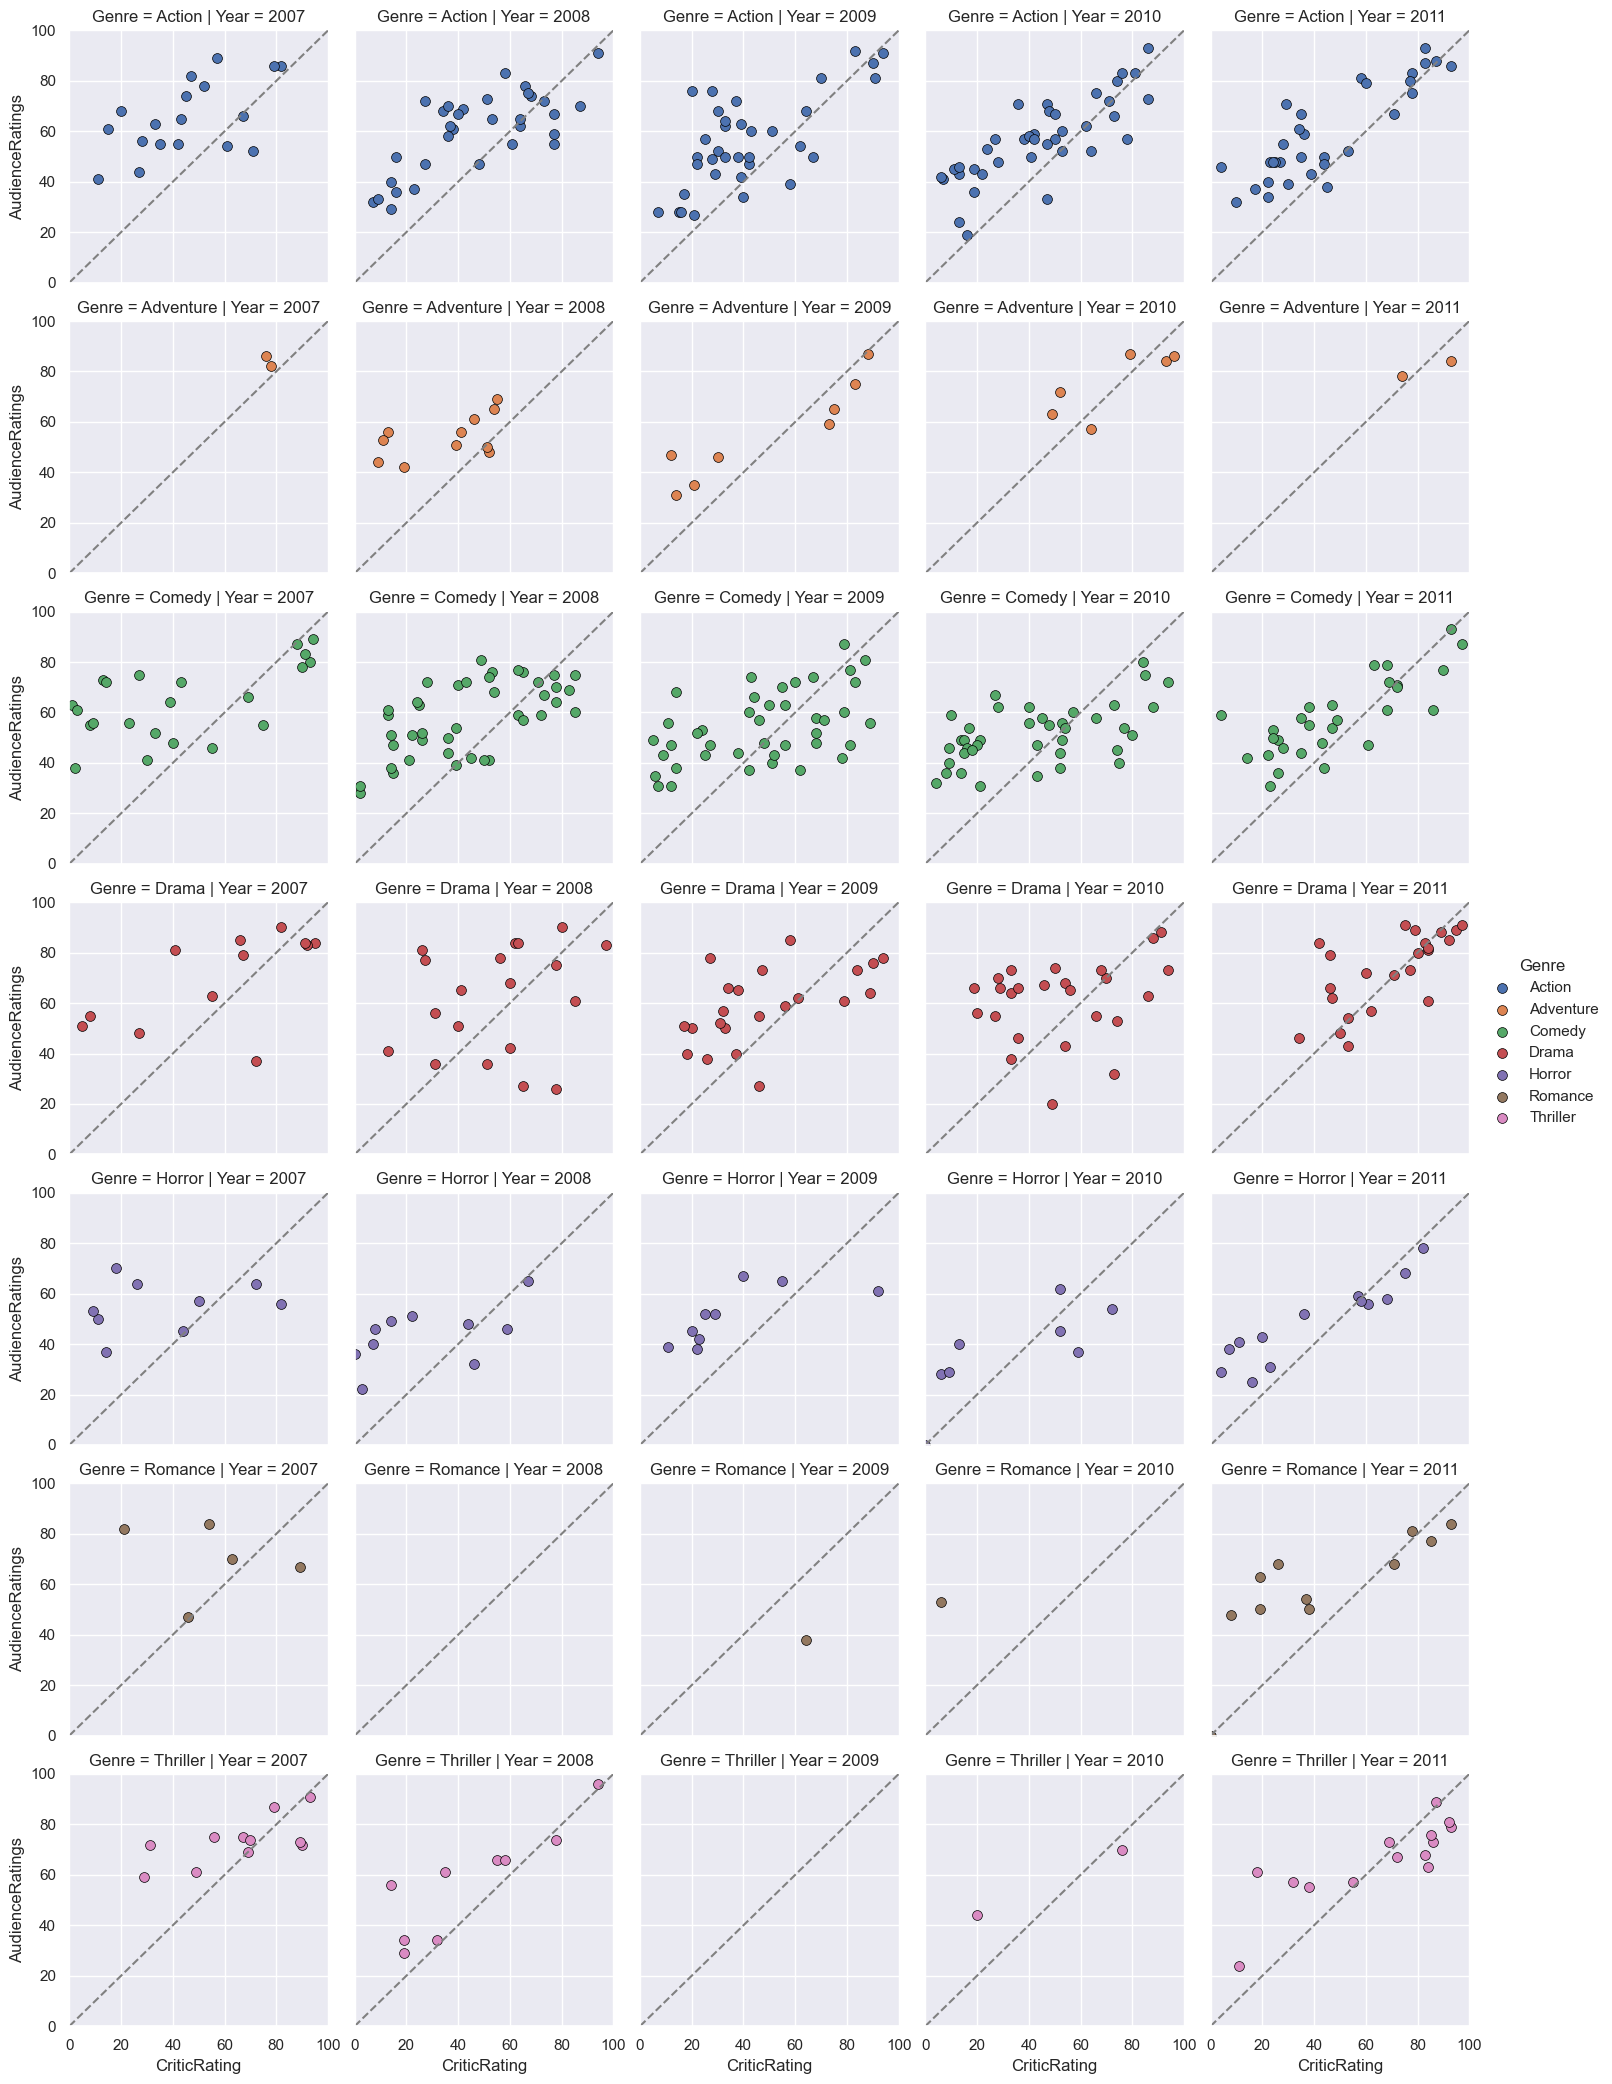

In [150]:
g =sns.FacetGrid(movies, row = 'Genre',col = 'Year', hue = 'Genre')
kws = dict(s=50, linewidth = 0.5, edgecolor= 'black') 
g=g.map(plt.scatter,'CriticRating', 'AudienceRatings', **kws )
g.set(xlim = (0,100), ylim = (0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c='grey', ls = '--' )
g.add_legend()   